## Based on content trends on Netflix, what type of title should Netflix produce next?

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("netflix_titles.csv")
df.head(2)

In [24]:
# checking if each column has null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [25]:
df.cast = df.cast.replace(np.nan, 'No Data')
df.director = df.director.replace(np.nan, 'No Data')
# can do this as well
# df.cast = df.cast.fillna('No Data')

df.country= df.country.fillna('No Data')

In [26]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [27]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [28]:
# 10 dates are missing so lets remove those rows
df.dropna(subset=['date_added'], axis=0, inplace=True)

In [29]:
df["date_added"] = pd.to_datetime(df['date_added'].astype(str).str.strip())
# adding str.strip() removes leading and trailing spaces so the format on which to_datetime works won't be disturbed

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [30]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021


In [31]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

<Figure size 200x100 with 0 Axes>

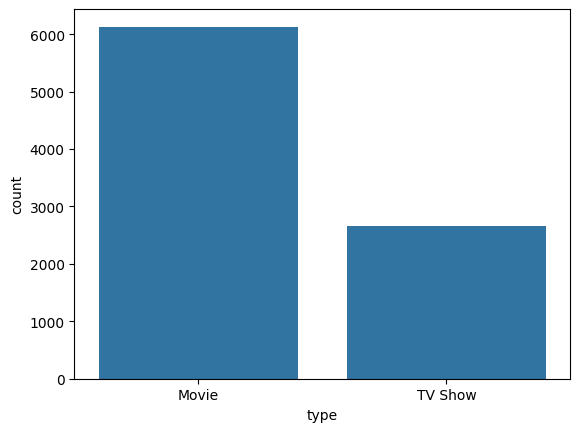

<Figure size 200x100 with 0 Axes>

In [32]:
sns.countplot(data=df, x=df.type)
plt.figure(figsize=(2,1))

In [33]:
typecount = df['type'].value_counts()
typecount

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1708ba3b390>,
 [Text(-0.6379851435134204, 0.8960886991007979, 'Movie'),
  Text(0.6379850082077839, -0.8960887954338643, 'TV Show')],
 [Text(-0.3479918964618656, 0.48877565405498063, '69.69%'),
  Text(0.3479918226587912, -0.4887757066002896, '30.31%')])

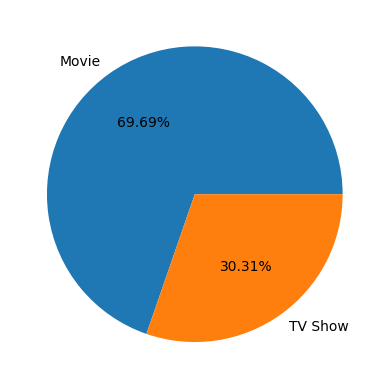

In [34]:
plt.pie(typecount.values, labels=typecount.index, autopct="%0.2f%%")

Movies are more than double of TV shows

In [35]:
# plt.pie(x=df.country[:5], labels=df.country[:5]) 
# the upper line is wrong cuz plt.pie expects numeric values, but we gave it country names

In [42]:
country_counts = df['country'].value_counts()
country_counts

country
United States                                    2812
India                                             972
No Data                                           830
United Kingdom                                    418
Japan                                             244
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
Canada, Mexico, Germany, South Africa               1
Name: count, Length: 749, dtype: int64

In [37]:
country_counts = df['country'].value_counts().head()
country_counts

country
United States     2812
India              972
No Data            830
United Kingdom     418
Japan              244
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 5 Countries')

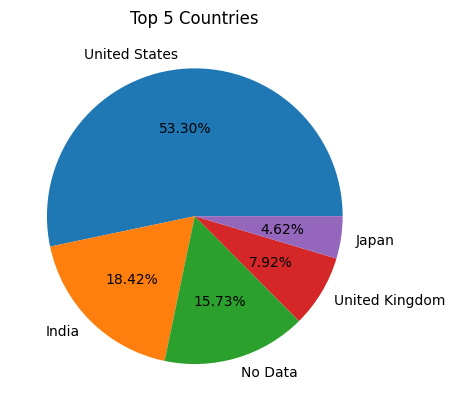

In [38]:
plt.pie(country_counts.values, labels=country_counts.index, autopct='%0.2f%%')
plt.title("Top 5 Countries")

In [39]:
titles_per_year = df['year_added'].value_counts().sort_index()
titles_per_year

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64

Text(0, 0.5, 'Count')

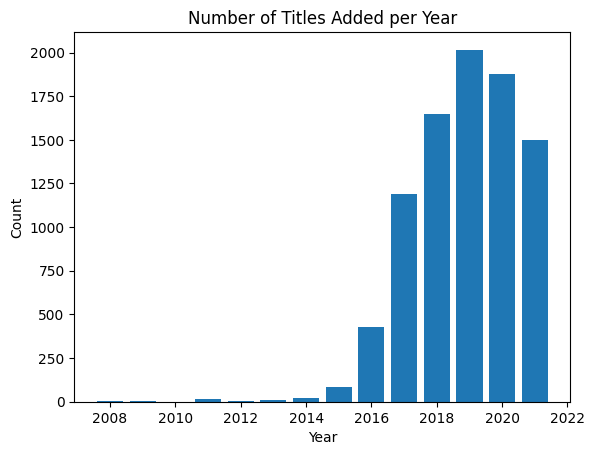

In [40]:
plt.bar(titles_per_year.index, titles_per_year.values)
plt.title("Number of Titles Added per Year")
plt.xlabel("Year")
plt.ylabel("Count")

In [ ]:
df.head(2)

In [ ]:
df['listed_in'].unique()